# 3.1 Sentiment Analysis

In [2]:
pip install vaderSentiment

Note: you may need to restart the kernel to use updated packages.


In [3]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [4]:
import pandas as pd
pd.set_option('display.max_colwidth', None)

In [5]:
df = pd.read_pickle("s19_df_corpus.pkl")
df
#input for sentiment analysis is the corpus

episode         start_times      segment  5_min_interval  \
0          1 2022-10-04 00:00:00        intro               0   
1          1 2022-10-04 00:05:00  first third               5   
2          1 2022-10-04 00:10:00  first third              10   
3          1 2022-10-04 00:15:00  first third              15   
4          1 2022-10-04 00:20:00  first third              20   
..       ...                 ...          ...             ...   
190       11 2022-10-04 01:15:00  third third              75   
191       11 2022-10-04 01:20:00  third third              80   
192       11 2022-10-04 01:25:00  third third              85   
193       11 2022-10-04 01:30:00  third third              90   
194       11 2022-10-04 01:35:00        outro              95   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [6]:
#code taken from nlp exercise 7 Metis
analyzer = SentimentIntensityAnalyzer()
df['score'] = df.lines.map(analyzer.polarity_scores).map(lambda x: x.get('compound'))
df.head()
#The compound score is the sum of positive, negative & neutral scores which is 
#then normalized between -1(most extreme negative) and +1 (most extreme positive). 
#The more Compound score closer to +1, the higher the positivity of the text..


episode         start_times      segment  5_min_interval  \
0        1 2022-10-04 00:00:00        intro               0   
1        1 2022-10-04 00:05:00  first third               5   
2        1 2022-10-04 00:10:00  first third              10   
3        1 2022-10-04 00:15:00  first third              15   
4        1 2022-10-04 00:20:00  first third              20   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [7]:
df.iloc[df.score.idxmin()]
lowest_sentiment = df.iloc[df.score.idxmin()]['score']
lowest_sentiment

0.7717

In [8]:
df.iloc[df.score.idxmin()]

episode                                                                                     5
start_times                                                               2022-10-04 01:25:00
segment                                                                                 outro
5_min_interval                                                                             85
lines              whoa  i love it  i m like you guys go  let s run away together  let us go 
score                                                                                  0.7717
Name: 87, dtype: object

In [9]:
df.iloc[df.score.idxmax()]

episode                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [10]:
df.groupby(["episode"]).score.mean()

episode
1     0.999418
2     0.990250
3     0.998578
4     0.998000
5     0.985833
6     0.990767
7     0.999506
8     0.997406
9     0.998194
10    0.998312
11    0.994490
Name: score, dtype: float64

In [11]:
df_ep1 = df[df.episode == 1]
df_ep2 = df[df.episode == 2]
df_ep3 = df[df.episode == 3]
df_ep4 = df[df.episode == 4]
df_ep5 = df[df.episode == 5]
df_ep6 = df[df.episode == 6]
df_ep7 = df[df.episode == 7]
df_ep8 = df[df.episode == 8]
df_ep9 = df[df.episode == 9]
df_ep10 = df[df.episode == 10]
df_ep11 = df[df.episode == 11]

In [12]:
df_ep1.score

0     0.9996
1     0.9998
2     0.9997
3     0.9993
4     0.9995
5     0.9997
6     0.9999
7     0.9998
8     0.9998
9     0.9998
10    0.9999
11    0.9997
12    0.9999
13    0.9994
14    0.9998
15    0.9984
16    0.9961
Name: score, dtype: float64

In [13]:
df_ep11.score

175    0.9984
176    0.9949
177    0.9980
178    0.9991
179    0.9999
180    0.9997
181    0.9995
182    0.9997
183    0.9982
184    0.9999
185    0.9994
186    0.9995
187    0.9996
188    0.9986
189    0.9963
190    0.9735
191    0.9980
192    0.9992
193    0.9989
194    0.9395
Name: score, dtype: float64

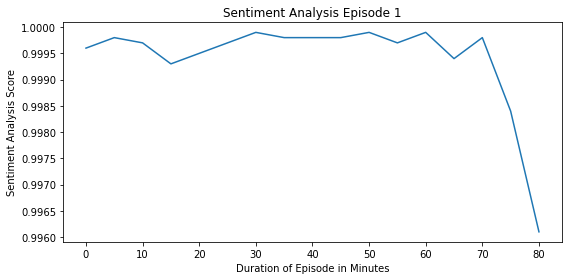

In [276]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 4))

# plotting the data
plt.plot(df_ep1["5_min_interval"], df_ep1["score"])
 
# Adding the title
plt.title("Sentiment Analysis Episode 1")
 
# Adding the labels
plt.ylabel("Sentiment Analysis Score")
plt.xlabel("Duration of Episode in Minutes")
#plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.2f')) ## Makes X-axis label with two decimal points
plt.show()

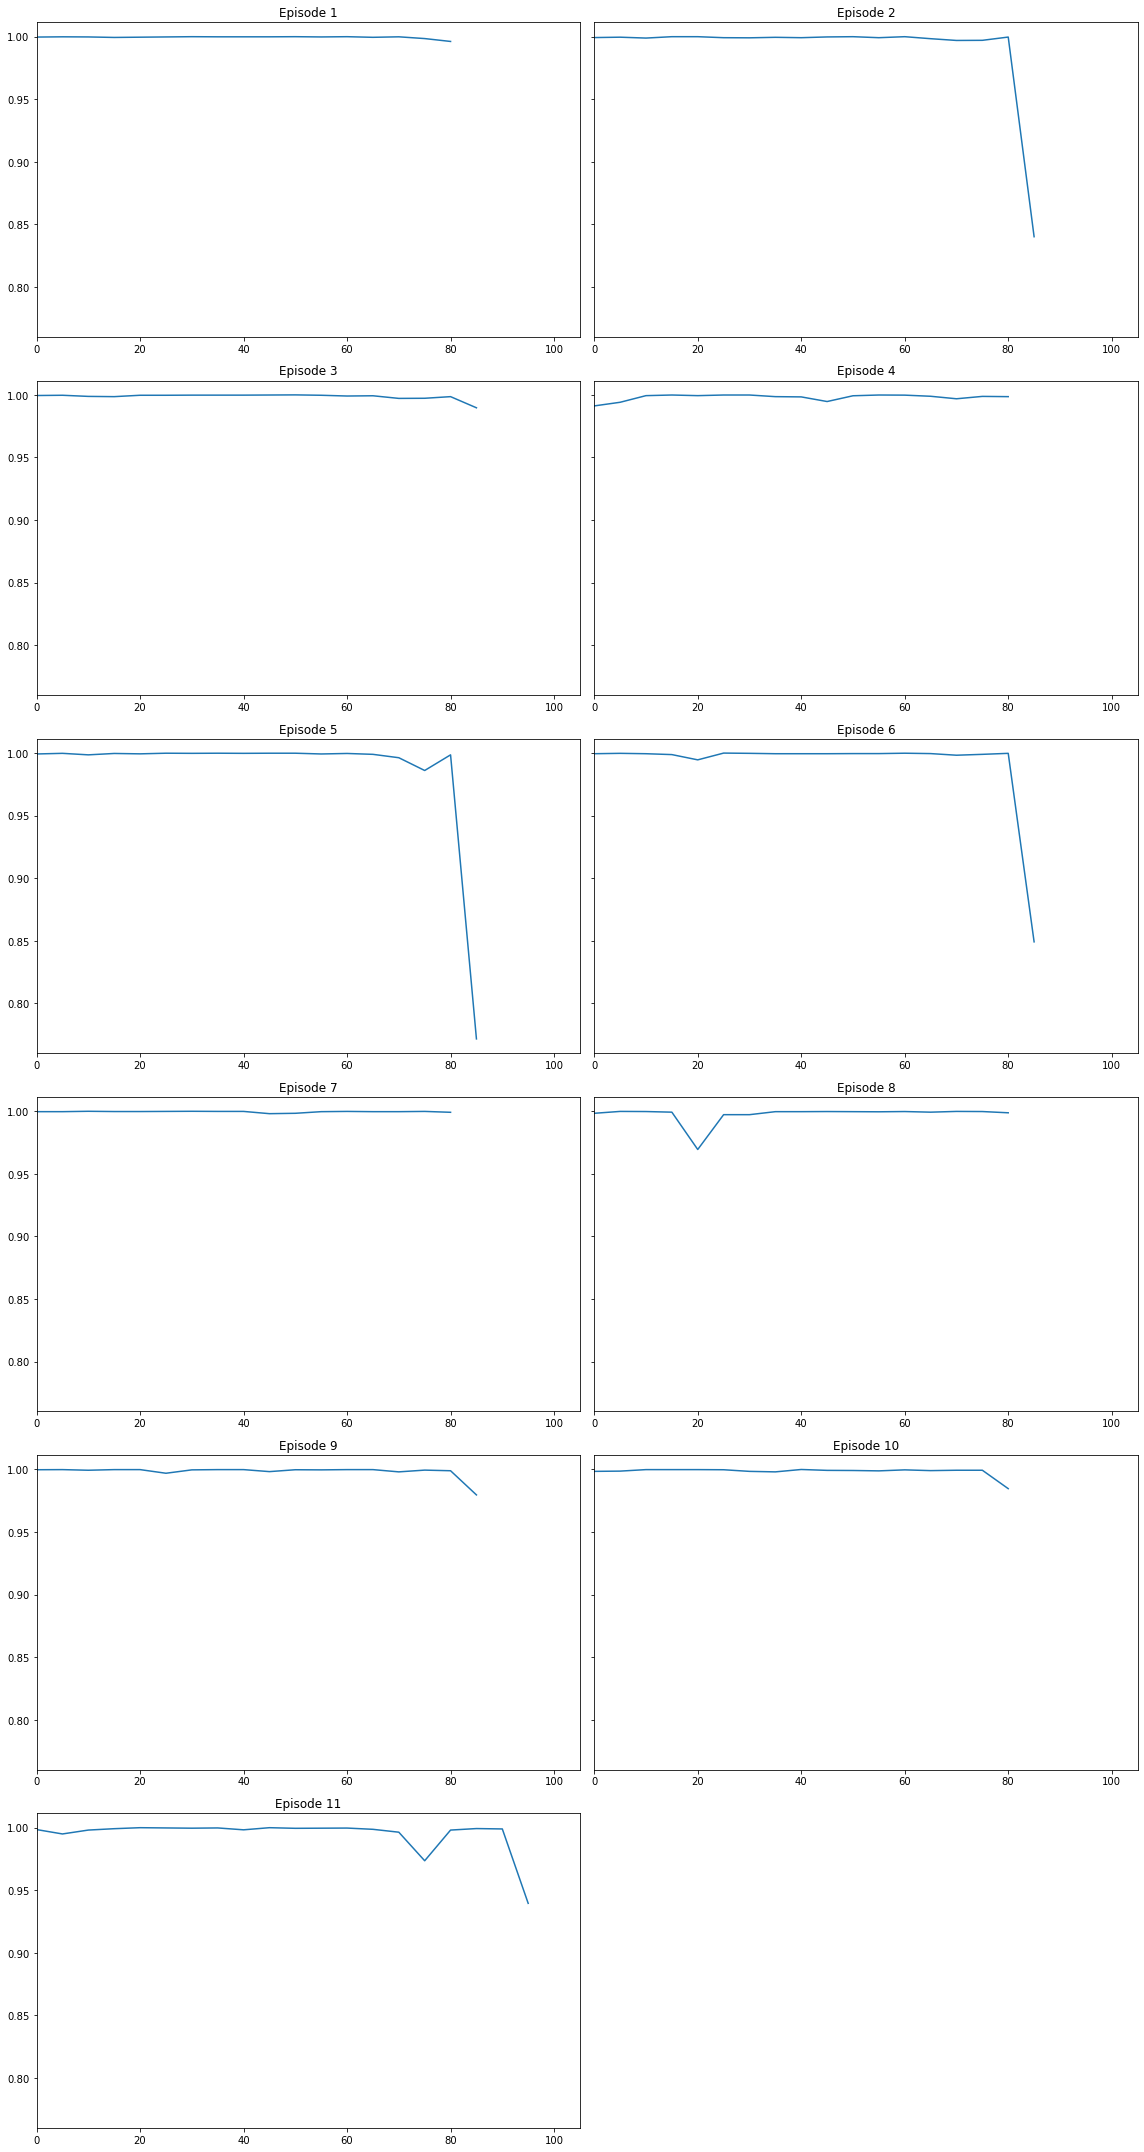

In [265]:
import matplotlib.pyplot as plt

#plt.rcParams['figure.figsize'] = [25, 20]
fig, axs = plt.subplots(6,2, figsize = (16, 30), sharey=True) #sharex=True
fig.delaxes(axs[5,1]) #deleting plot at space [5,1] because no episode 12

axs[0,0].plot(df_ep1["5_min_interval"], df_ep1["score"])
axs[0,1].plot(df_ep2["5_min_interval"], df_ep2["score"])
axs[1,0].plot(df_ep3["5_min_interval"], df_ep3["score"])
axs[1,1].plot(df_ep4["5_min_interval"], df_ep4["score"])
axs[2,0].plot(df_ep5["5_min_interval"], df_ep5["score"])
axs[2,1].plot(df_ep6["5_min_interval"], df_ep6["score"])
axs[3,0].plot(df_ep7["5_min_interval"], df_ep7["score"])
axs[3,1].plot(df_ep8["5_min_interval"], df_ep8["score"])
axs[4,0].plot(df_ep9["5_min_interval"], df_ep9["score"])
axs[4,1].plot(df_ep10["5_min_interval"], df_ep10["score"])
axs[5,0].plot(df_ep11["5_min_interval"], df_ep11["score"])

axs[0,0].title.set_text('Episode 1')
axs[0,1].title.set_text('Episode 2')
axs[1,0].title.set_text('Episode 3')
axs[1,1].title.set_text('Episode 4')
axs[2,0].title.set_text('Episode 5')
axs[2,1].title.set_text('Episode 6')
axs[3,0].title.set_text('Episode 7')
axs[3,1].title.set_text('Episode 8')
axs[4,0].title.set_text('Episode 9')
axs[4,1].title.set_text('Episode 10')
axs[5,0].title.set_text('Episode 11')

plt.setp(axs, xlim=(0,105))

plt.tight_layout()
plt.show()